In [66]:
import pandas as pd
import matplotlib.pyplot as plt


bitcoin_users_file = "/Users/michal/Downloads/bitcoin.stackexchange.com/Users.xml"
cardano_users_file = "/Users/michal/Downloads/cardano.stackexchange.com/Users.xml"
solana_users_file = "/Users/michal/Downloads/solana.stackexchange.com/Users.xml"
ethereum_users_file = "/Users/michal/Downloads/ethereum.stackexchange.com/Users.xml"



In [8]:
df_users_btc = pd.read_xml(bitcoin_users_file)
df_users_ada = pd.read_xml(cardano_users_file)
df_users_sol = pd.read_xml(solana_users_file)
df_users_eth = pd.read_xml(ethereum_users_file)

df_users_btc["CreationDate"] = pd.to_datetime(df_users_btc["CreationDate"])
df_users_btc["LastAccessDate"] = pd.to_datetime(df_users_btc["LastAccessDate"])

df_users_ada["CreationDate"] = pd.to_datetime(df_users_ada["CreationDate"])
df_users_ada["LastAccessDate"] = pd.to_datetime(df_users_ada["LastAccessDate"])

df_users_sol["CreationDate"] = pd.to_datetime(df_users_sol["CreationDate"])
df_users_sol["LastAccessDate"] = pd.to_datetime(df_users_sol["LastAccessDate"])

df_users_eth["CreationDate"] = pd.to_datetime(df_users_eth["CreationDate"])
df_users_eth["LastAccessDate"] = pd.to_datetime(df_users_eth["LastAccessDate"])

36.259800965018094
1.0


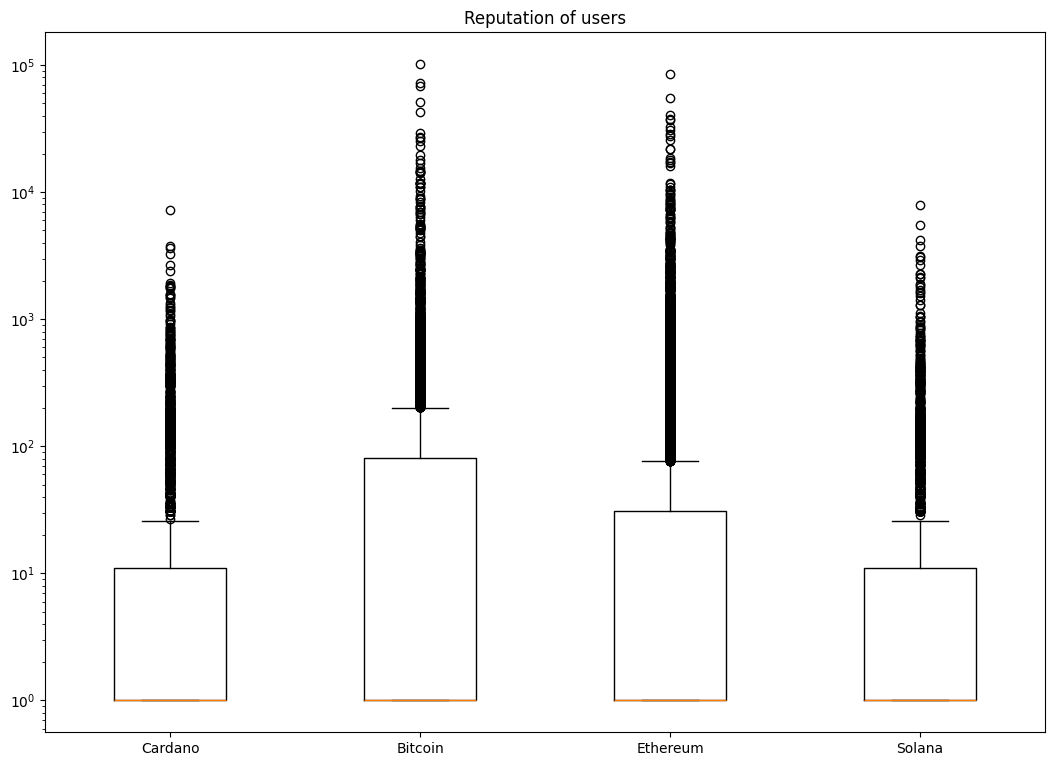

In [103]:
import numpy as np
import seaborn as sns

repSol = df_users_sol["Reputation"]
repBtc = df_users_btc["Reputation"]
repEth = df_users_eth["Reputation"]
repAda = df_users_ada["Reputation"]
max(repSol)
mean_rep = np.mean(repSol)
print(mean_rep)
median_rep = np.median(repSol)
print(median_rep)

# box = rep.plot.box()
data = [repAda, repBtc, repEth, repSol]
# sns.boxplot(data=allData)
# plt.boxplot(repSol)

# plt.yscale('log')

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Cardano', 'Bitcoin', 'Ethereum', 'Solana'])
 
plt.yscale('log')
plt.title("Reputation of users")
# show plot
plt.show()


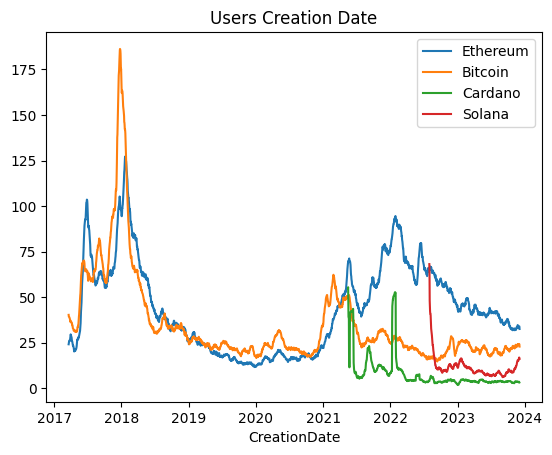

In [69]:
# Filter the dataframe based on the desired date range
start_date = '2017-03-01'
users_btc = df_users_btc[(df_users_btc['CreationDate'] >= start_date)]
users_eth= df_users_eth[(df_users_eth['CreationDate'] >= start_date)]
users_ada = df_users_ada[(df_users_ada['CreationDate'] >= start_date)]
users_sol = df_users_sol[(df_users_sol['CreationDate'] >= start_date)]

creationDateGroupedBtc = users_btc.groupby(users_btc['CreationDate'].dt.date).size()

creationDateGroupedEth = users_eth.groupby(users_eth['CreationDate'].dt.date).size()
creationDAteGroupedAda = users_ada.groupby(users_ada['CreationDate'].dt.date).size()
creationDateGroupedSol = users_sol.groupby(users_sol['CreationDate'].dt.date).size()





window_size = 20

rolling_mean_eth_users = creationDateGroupedEth.rolling(window_size).mean()
rolling_mean_eth_users.plot(label="Ethereum")
rolling_mean_btc_users = creationDateGroupedBtc.rolling(window_size).mean()
rolling_mean_btc_users.plot(label="Bitcoin")
rolling_mean_ada_users = creationDAteGroupedAda.rolling(window_size).mean()
rolling_mean_ada_users.plot(label="Cardano")
rolling_mean_sol_users = creationDateGroupedSol.rolling(window_size).mean()
rolling_mean_sol_users.plot(label="Solana")
plt.title('Users Creation Date')

plt.legend()


In [47]:
minUsersCreatedBtc = creationDateGroupedBtc.min()
maxUsersCreatedBtc = creationDateGroupedBtc.max()
differenceInCreatedUsersBtc = maxUsersCreatedBtc - minUsersCreatedBtc

# minPriceEth = eth_historical['Open'].min()
# maxPriceEth = eth_historical['Open'].max()
# differencePriceEth = maxPriceEth - minPriceEth
# bitcoin_historical_zeroONe = bitcoin_historical.copy()["priceZeroOne"] == (bitcoin_historical["price"]-minPrice)/differencePrice
differenceInCreatedUsersBtc = (creationDateGroupedBtc.values - minUsersCreatedBtc) / differenceInCreatedUsersBtc
# eth_historical['priceZero'] = (eth_historical['Open'] - minPriceEth) / differencePriceEth


window_size = 20
# rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
# rolling_mean_eth.plot()
rolling_mean_btc_users = differenceInCreatedUsersBtc.rolling(window_size).mean()
rolling_mean_btc_users.plot()


AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

<Axes: xlabel='Date'>

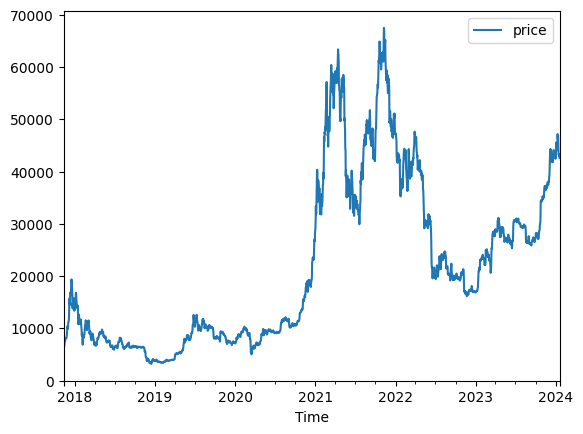

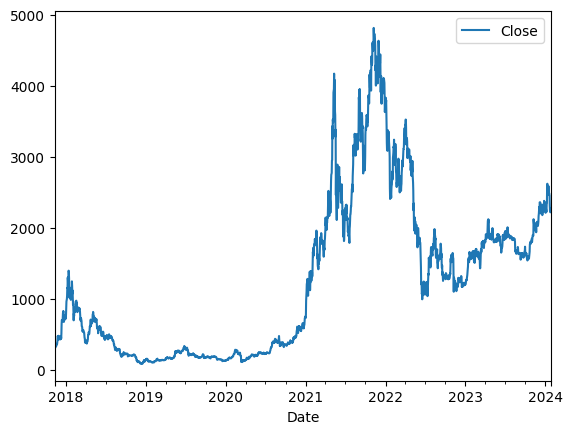

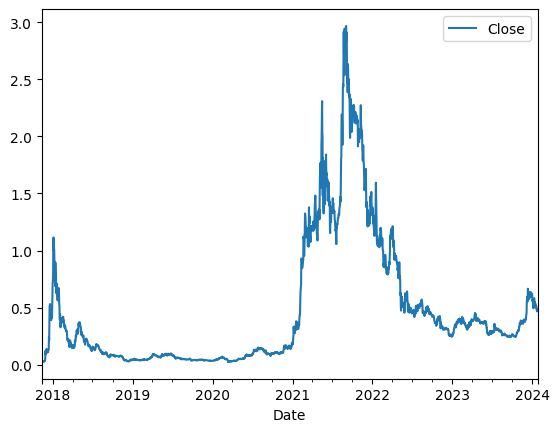

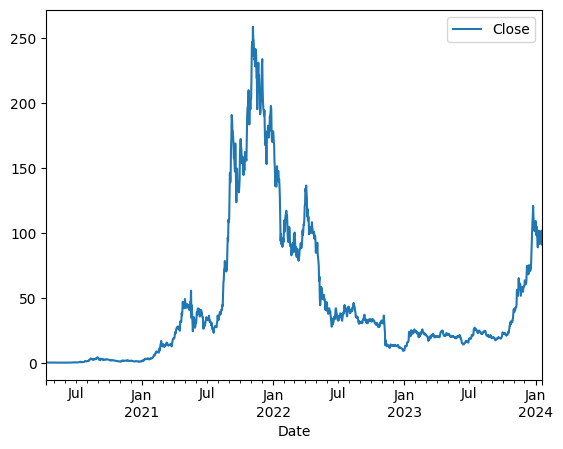

In [63]:
start_date = '2017-11-11'

bitcoin_historical = pd.read_csv("./historical_prices/bitcoin_data.csv")

bitcoin_historical['Time'] = pd.to_datetime(bitcoin_historical['Time'])
bitcoin_historical = bitcoin_historical[bitcoin_historical['Time'] >= start_date]

bitcoin_historical['Derivative'] = bitcoin_historical['price'].diff()
bitcoin_historical['RelativeChange'] = bitcoin_historical['Derivative']/(bitcoin_historical['price'].rolling(20).mean())
bitcoin_historical.plot(x='Time', y='price', kind='line')


eth_historical = pd.read_csv("./historical_prices/ETH-USD.csv")


eth_historical['Date'] = pd.to_datetime(eth_historical['Date'])
eth_historical = eth_historical[eth_historical['Date'] >= start_date]
eth_historical['Derivative'] = eth_historical['Close'].diff()
eth_historical['RelativeChange'] = eth_historical['Derivative']/(eth_historical['Close'].rolling(20).mean())
eth_historical.plot(x='Date', y='Close', kind='line')


ada_historical = pd.read_csv("./historical_prices/ADA-USD.csv")
ada_historical['Date'] = pd.to_datetime(ada_historical['Date'])
ada_historical = ada_historical[ada_historical['Date'] >= start_date]
ada_historical['Derivative'] = ada_historical['Close'].diff()
ada_historical['RelativeChange'] = ada_historical['Derivative']/(ada_historical['Close'].rolling(20).mean())
ada_historical.plot(x='Date', y='Close', kind='line')

sol_historical = pd.read_csv("./historical_prices/SOL-USD.csv")
sol_historical['Date'] = pd.to_datetime(sol_historical['Date'])
sol_historical = sol_historical[sol_historical['Date'] >= start_date]
sol_historical['Derivative'] = sol_historical['Close'].diff()
sol_historical['RelativeChange'] = sol_historical['Derivative']/(sol_historical['Close'].rolling(20).mean())
sol_historical.plot(x='Date', y='Close', kind='line')


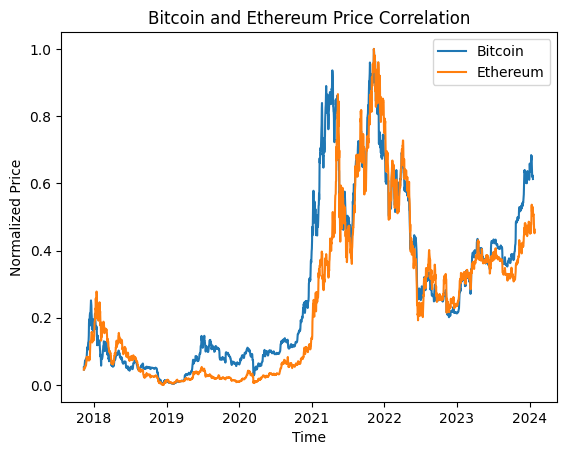

In [36]:
minPriceBtc = bitcoin_historical['price'].min()
maxPriceBtc = bitcoin_historical['price'].max()
differencePriceBtc = maxPriceBtc - minPriceBtc

minPriceEth = eth_historical['Open'].min()
maxPriceEth = eth_historical['Open'].max()
differencePriceEth = maxPriceEth - minPriceEth
# bitcoin_historical_zeroONe = bitcoin_historical.copy()["priceZeroOne"] == (bitcoin_historical["price"]-minPrice)/differencePrice
bitcoin_historical['priceZero'] = (bitcoin_historical['price'] - minPriceBtc) / differencePriceBtc
eth_historical['priceZero'] = (eth_historical['Open'] - minPriceEth) / differencePriceEth

# bitcoin_historical.plot(x='Time', y='priceZero', kind='line', title="Bitcoin price")
# eth_historical.plot(x='Date', y='priceZero', kind='line', title="Ethereum price")

import matplotlib.pyplot as plt

plt.plot(bitcoin_historical['Time'], bitcoin_historical['priceZero'], label='Bitcoin')
plt.plot(eth_historical['Date'], eth_historical['priceZero'], label='Ethereum')
plt.plot
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Bitcoin and Ethereum Price Correlation')
plt.legend()
plt.show()


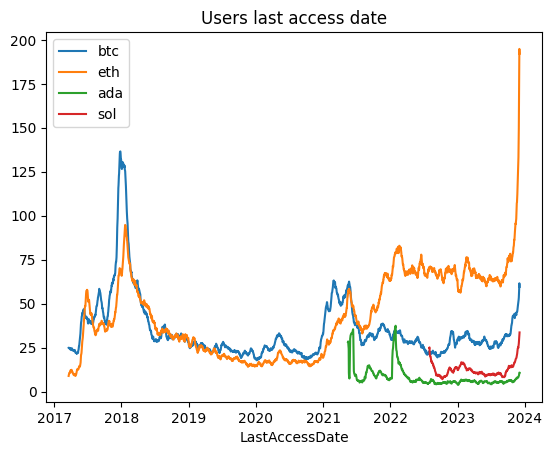

In [62]:
creationDateGroupedBtc = users_btc.groupby(users_btc['CreationDate'].dt.date).size()
lastAccessDateGroupedBtc = users_btc.groupby(users_btc['LastAccessDate'].dt.date).size()

window_size = 20
# rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
# rolling_mean_eth.plot()
rolling_users_last_access_btc = lastAccessDateGroupedBtc.rolling(window_size).mean()
rolling_users_last_access_btc.plot(label='btc')

creationDateGroupedEth = users_eth.groupby(users_eth['CreationDate'].dt.date).size()
lastAccessDateGroupedEth = users_eth.groupby(users_eth['LastAccessDate'].dt.date).size()
rolling_users_last_access_eth = lastAccessDateGroupedEth.rolling(window_size).mean()
rolling_users_last_access_eth.plot(label='eth')

creationDateGroupedAda = users_ada.groupby(users_ada['CreationDate'].dt.date).size()
lastAccessDateGroupedAda = users_ada.groupby(users_ada['LastAccessDate'].dt.date).size()
rolling_users_last_access_ada = lastAccessDateGroupedAda.rolling(window_size).mean()
rolling_users_last_access_ada.plot(label='ada')

creationDateGroupedSol = users_sol.groupby(users_sol['CreationDate'].dt.date).size()
lastAccessDateGroupedSol = users_sol.groupby(users_sol['LastAccessDate'].dt.date).size()
rolling_users_last_access_sol = lastAccessDateGroupedSol.rolling(window_size).mean()
rolling_users_last_access_sol.plot(label='sol')


plt.title('Users last access date')

plt.legend()

